### 버스 운행시간 예측
- [교통] 공공 교통 빅데이터와 AI 를 이용하여 교통이용 분석 - 버스, 회귀, 

 
### 1. 배경
- 제주도내 주민등록인구는 2019년 11월 기준 69만명으로, 연평균 4%대로 성장했습니다. 외국인과 관광객까지 고려하면 전체 상주인구는 90만명을 넘을 것으로 추정됩니다. 제주도민 증가와 외국인의 증가로 현재 제주도의 교통체증이 심각한 문제로 떠오르고 있습니다. 2017년 한국은행 제주본부에 따르면 제주도 일부 지역은 교통체증이 서울보다 심각합니다. 따라서, 제주테크노파크는 교통난 심화를 해결하기 위해 데이터 분석 대회를 개최합니다.

### 2. 목적
- 제주도 버스의 효율적인 운행를 위해 운행 시간을 예측하는 모델 만들기 ! 

### 3. 변수
- next_arrive_time 이 목적변수 !

In [2]:
# 1. 데이터 탐색 - (0) 관련 라이브러리 로딩
import numpy as np # 행렬 연산 / 데이터 핸들링
import pandas as pd # 데이터 분석

import os
os.chdir('C:\\Users\\urse\\Desktop\\dataset\\Dacon-BusJeju2')

# 데이터 불러오기
train_data = pd.read_csv('train.csv', engine='python') # 학습 데이터
test_data = pd.read_csv('test.csv', engine='python') # 시험 데이터

print('데이터 로딩 완료')

데이터 로딩 완료


In [3]:
# 1. 데이터 탐색 - (1) 훈련 데이터 확인
print(train_data.shape)
train_data.head()

(210457, 14)


,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64


In [4]:
# 1. 데이터 탐색 - (2) 테스트 데이터 확인
print(test_data.shape)
test_data.head()

## => next_arrive_time이 목적변수 !

(91774, 13)


,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude
0,210457,2019-10-29,405136001,7997025,360-1,33.457724,126.554014,제대마을,07시,333.0,제대아파트,33.458783,126.557353
1,210458,2019-10-29,405136001,7997025,360-1,33.458783,126.557353,제대아파트,07시,415.0,제주대학교,33.459893,126.561624
2,210459,2019-10-29,405136001,7997025,360-1,33.478867,126.483833,한라중학교/부영아파트,08시,417.0,대림2차아파트,33.478850,126.488350
3,210460,2019-10-29,405136001,7997025,360-1,33.478850,126.488350,대림2차아파트,08시,334.0,연동대림1차아파트,33.480700,126.489933
4,210461,2019-10-29,405136001,7997025,360-1,33.480700,126.489933,연동대림1차아파트,08시,550.0,케이티앤지,33.482077,126.485355


In [5]:
# 1. 데이터 탐색 - (3) dtypes 확인
print('#### train_dtypes\n', train_data.dtypes)
print('\n#### test_dtypes\n', test_data.dtypes)
# -> train data와 test data의 데이터 형식은 일치
# -> date 변수 datetime 변수형으로 변환 필요

#### train_dtypes
 id                    int64
date                 object
route_id              int64
vh_id                 int64
route_nm             object
now_latitude        float64
now_longitude       float64
now_station          object
now_arrive_time      object
distance            float64
next_station         object
next_latitude       float64
next_longitude      float64
next_arrive_time      int64
dtype: object

#### test_dtypes
 id                   int64
date                object
route_id             int64
vh_id                int64
route_nm            object
now_latitude       float64
now_longitude      float64
now_station         object
now_arrive_time     object
distance           float64
next_station        object
next_latitude      float64
next_longitude     float64
dtype: object


In [6]:
# 1. 데이터탐색 - (4) train - object형 unique - date, route_nm, now_station, now_arrive_time, next_station 5개
print('### train data')
for i in train_data.columns:
    if train_data[i].dtypes=='object':
        print(i, train_data[i].unique(), '==>', len(train_data[i].unique()), '개\n')
        
# date => 14개 (2019년 10월 15일 ~ 2019년 10월 28일 총 14일)
# route_nm => 21개
# now_station => 348개
# now_arrive_time => 20개 ( 05시 ~ 00시)
# next_station => 350개

### train data
date ['2019-10-15' '2019-10-16' '2019-10-17' '2019-10-18' '2019-10-19'
 '2019-10-20' '2019-10-21' '2019-10-22' '2019-10-23' '2019-10-24'
 '2019-10-25' '2019-10-26' '2019-10-27' '2019-10-28'] ==> 14 개

route_nm ['360-1' '360-2' '360-7' '360-12' '365-21' '365-22' '201-11' '201-12'
 '201-13' '201-14' '201-15' '201-16' '201-17' '201-18' '201-21' '201-22'
 '201-24' '201-26' '201-27' '281-1' '281-2'] ==> 21 개

now_station ['제주대학교입구' '제대마을' '제대아파트' '남국원(아라방면)' '도호동' '한라중학교/부영아파트' '대림2차아파트' '롯데마트'
 '원노형' '노형오거리' '남녕고등학교' '한라병원' '삼무공원사거리' '제원아파트' '은남동' '연동주민센터'
 '제주도청 신제주로터리' '월구마을' '동성마을' '제주버스터미널' '한국병원' '남서광마을입구' '남서광마을'
 '탐라장애인 종합복지관' '제주시청(아라방면)' '고산동산(아라방면)' '제주지방법원(아라방면)' '아라초등학교' '아라주공아파트'
 '인다마을' '남국사' '연동대림1차아파트' '케이티앤지' '제주중앙여자고등학교(아라방면)' '제주여자중고등학교(아라방면)'
 '제주대학교병원' '연동입구' '오라3동' '죽성마을 입구' '제주대학교' '부영아파트' '제주시청(광양방면)'
 '고산동산(광양방면)' '제주여자중고등학교(광양방면)' '아라동주민센터' '남국원(광양방면)' '제주지방법원(광양방면)'
 '제주중앙여자고등학교(광양방면)' '웃 인다 마을' '제주대학교 입구' '광양사거리' '홍랑로입구' '용천마을' '동산교'
 '오라오거리' '명신마

In [7]:
# 1. 데이터탐색 - (5) test - object형 unique - date, route_nm, now_station, now_arrive_time, next_station 5개
print('### test data')
for i in test_data.columns:
    if test_data[i].dtypes=='object':
        print(i, test_data[i].unique(), '==>', len(test_data[i].unique()), '개\n')
        
# date => 8개 (19년 10월 29일 ~ 19년 11월 5일  총 8일)
# route_nm => 21개
# now_station => 349개
# now_arrive_time => 19개 (05시 ~ 23시)
# next_station => 350개

### test data
date ['2019-10-29' '2019-10-30' '2019-10-31' '2019-11-01' '2019-11-02'
 '2019-11-03' '2019-11-04' '2019-11-05'] ==> 8 개

route_nm ['360-1' '360-2' '360-7' '360-12' '365-21' '365-22' '201-11' '201-12'
 '201-13' '201-14' '201-15' '201-16' '201-17' '201-18' '201-21' '201-22'
 '201-24' '201-26' '201-27' '281-1' '281-2'] ==> 21 개

now_station ['제대마을' '제대아파트' '한라중학교/부영아파트' '대림2차아파트' '연동대림1차아파트' '케이티앤지' '롯데마트' '원노형'
 '남녕고등학교' '한라병원' '삼무공원사거리' '제원아파트' '은남동' '도호동' '연동주민센터' '동성마을' '제주버스터미널'
 '한국병원' '남서광마을입구' '남서광마을' '탐라장애인 종합복지관' '제주시청(아라방면)' '고산동산(아라방면)'
 '제주지방법원(아라방면)' '제주중앙여자고등학교(아라방면)' '제주여자중고등학교(아라방면)' '남국원(아라방면)' '아라초등학교'
 '아라주공아파트' '인다마을' '제주대학교병원' '제주대학교입구' '노형오거리' '제주도청 신제주로터리' '월구마을' '연동입구'
 '오라3동' '남국사' '제주대학교' '제주고등학교/중흥S클래스' '죽성마을 입구' '부영아파트' '제주시청(광양방면)'
 '고산동산(광양방면)' '남국원(광양방면)' '제주여자중고등학교(광양방면)' '제주중앙여자고등학교(광양방면)'
 '제주지방법원(광양방면)' '웃 인다 마을' '아라동주민센터' '제주대학교 입구' '광양사거리' '홍랑로입구' '용천마을'
 '동산교' '오라오거리' '명신마을' '월랑마을 남녕고등학교' '제주제일고등학교' '으뜸마을' '탐라도서관'
 '제주한라대학교(종점)' '시티주유소'

In [8]:
# 1. 데이터 탐색 - (6) train - 수치형 데이터 중 유의미한 수치형 2개 -> distance, next_arrive_time
train_numeric = train_data[['distance', 'next_arrive_time']]
print(train_numeric.shape)
train_numeric.describe()

# -> 수치형변수 next_arrive_time의 최고값이 698 그 이후값은 제거해도 된다?

(210457, 2)


,distance,next_arrive_time
count,210457.000000,210457.000000
mean,490.256100,85.380824
std,520.563932,85.051170
min,97.000000,6.000000
25%,291.000000,44.000000
50%,384.000000,66.000000
75%,542.000000,102.000000
max,7461.000000,2996.000000


c:\users\urse\anaconda3\envs\untitled\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\urse\anaconda3\envs\untitled\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)


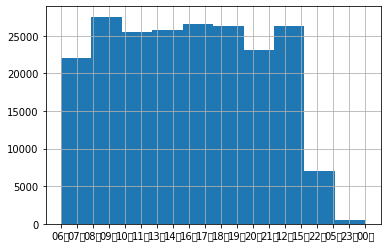

In [10]:
# 1. 데이터 탐색 - (7) train data 현재 도착시간과 예측시간의 분포 분석 - histogram
train_var = train_data['now_arrive_time']
train_var.hist()

# -> 확인결과 22시, 23시, 00시, 05시, 데이터가 비교적 적음. 나머진 균등 

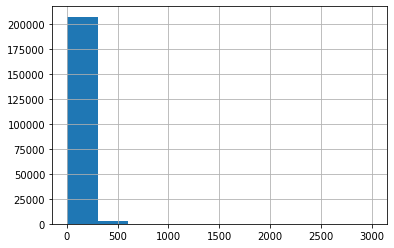

In [11]:
# 1. 데이터 탐색 - (7) train data 현재 도착시간과 예측시간의 분포 분석 - histogram
train_target = train_data['next_arrive_time']
train_target.hist()

# => 확인 결과 대부분의 데이터가 0~200사이, 200넘어가는건 적음
# => 700이상에서 잘라내는 것 좋음.

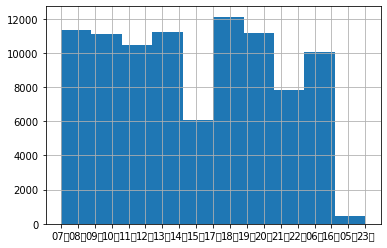

In [13]:
# 1. 데이터 탐색 - (8) test_data 현재 도착시간의 분포 분석 - histogram
test_var = test_data['now_arrive_time']
test_var.hist()

# -> 확인결과 05시, 23시 데이터가 적음. 
# -> 훈련 데이터가 22시 데이터가 적어서 22시 결과는 잘 안나올수도 있지 않을까 생각이 듬

### 데이터 탐색 정리
- train data와 test data의 데이터 형식은 일치
- date 변수 datetime 변수형으로 변환 필요
- train과 test사이에 변수간 차이 발생 
> 훈련데이터가 테스트 데이터보다 많은건 괜찮지만 테스트 데이터가 훈련 데이터보다 많은 건 안좋을 수 있음   
> now_station 과 next_station 없는것 빼기?   
> now_arrive_time은 시간은 훈련데이터가 더 많으니까 괜찮음   
> now_station과 next_station은 같은 항목이란걸 알수 있음   
- 수치형 변수 next_arrive_time의 최고값이 698. 그 초과값은 제거해도 된다? (describe, histogram에 의한 판단)
- train data는 22시 데이터가 적어서 22시 test 결과가 잘 안나올 수도 있지 않을까?
- route_nm과 route_id는 같은 역할의 데이터? 제거?  
- id는 학습에서 의미 없으니 이도 제거?

In [14]:
# 2. 데이터 전처리 - (1) 이상치 제거
# 학습에 방해되는 요소 outlier 제거 / 
# describe로 수치형을 해봤을 때 max값은 698 까지밖에 안잡아줌 . 따라서 그 이후에 값들은 큰 의미가 없다고 판단
train_data = train_data[train_data['next_arrive_time'] <= 698]

print('outlier 제거된 후 훈련 데이터 기존: 210457 -> 현재 ', train_data.shape) # 310개 제거되었음.
print(210457-train_data.shape[0],'개 제거됨')

outlier 제거된 후 훈련 데이터 기존: 210457 -> 현재  (210147, 14)
310 개 제거됨


In [18]:
# 2. 데이터 전처리 - (2) 정류장명 인코딩 작업
from sklearn.preprocessing import LabelEncoder # 라벨 인코더

# 인코딩시에 관련 
station = pd.Series(list(train_data['now_station'].values) + list(train_data['next_station'].values))
station_list = station.unique()
print('전체 station_list 갯수 ', len(station_list))

# 모든 학습, 시험 데이터의 정류장 정보 치환
station_encoder = LabelEncoder() # 인코더 생성
station_encoder.fit(list(station_list)) # 인코딩

train_encoding_data = train_data.copy()
test_encoding_data = test_data.copy()

train_encoding_data['now_station'] = station_encoder.transform(train_data['now_station'])
train_encoding_data['next_station'] = station_encoder.transform(train_data['next_station'])
test_encoding_data['now_station'] = station_encoder.transform(test_data['now_station'])
test_encoding_data['next_station'] = station_encoder.transform(test_data['next_station'])

print('데이터 전처리 인코딩 완료')

전체 station_list 갯수  351
데이터 전처리 인코딩 완료


In [19]:
# 2. 데이터 전처리 - (3) 정류장명 인코딩 작업 결과확인
print(train_encoding_data.shape)
train_encoding_data.head()

(210147, 14)


,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,239,06시,266.0,227,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,227,06시,333.0,228,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,228,06시,415.0,235,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,41,06시,578.0,249,33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,63,07시,374.0,221,33.485822,126.490897,64


In [20]:
# 2. 데이터 전처리 - (4) 날짜를 datetime으로
train_encoding_data['date'] = pd.to_datetime(train_encoding_data['date']) # date 값을 datetime으로
test_encoding_data['date'] = pd.to_datetime(test_encoding_data['date']) # date 값을 datetime으로
print('날짜 datetime 변환 완료')

날짜 datetime 변환 완료


In [21]:
# 2. 데이터 전처리 - (5) train - 요일 변수 생성 및 평일과 주말 두가지로 분류

# 0 ~ 5 는 월요일 ~ 금요일이므로 평일이면 0, 주말이면 1을 설정
train_encoding_data['weekday'] = train_encoding_data['date'].dt.weekday  # Monday 0, Sunday 6
train_encoding_data['weekday'] = train_encoding_data['weekday'].apply(lambda x: 0 if x < 5 else 1)

# encoding2 결과 dataframe 생성
train_encoding_data2 = pd.get_dummies(train_encoding_data, columns=['weekday']) # 평일/주말에 대해 One-hot Encoding

train_encoding_data2 = train_encoding_data2.drop('date', axis=1) # 필요없는 data 칼럼 drop
print(train_encoding_data2.shape)
train_encoding_data2.head()

(210147, 15)


,id,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time,weekday_0,weekday_1
0,0,405136001,7997025,360-1,33.456267,126.551750,239,06시,266.0,227,33.457724,126.554014,24,1,0
1,1,405136001,7997025,360-1,33.457724,126.554014,227,06시,333.0,228,33.458783,126.557353,36,1,0
2,2,405136001,7997025,360-1,33.458783,126.557353,228,06시,415.0,235,33.459893,126.561624,40,1,0
3,3,405136001,7997025,360-1,33.479705,126.543811,41,06시,578.0,249,33.484860,126.542928,42,1,0
4,4,405136001,7997025,360-1,33.485662,126.494923,63,07시,374.0,221,33.485822,126.490897,64,1,0


In [22]:
# 2. 데이터 전처리 - (6) test - 요일 변수 생성 및 평일과 주말 두가지로 분류

# 0 ~ 5 는 월요일 ~ 금요일이므로 평일이면 0, 주말이면 1을 설정
test_encoding_data['weekday'] = test_encoding_data['date'].dt.weekday  # Monday 0, Sunday 6
test_encoding_data['weekday'] = test_encoding_data['weekday'].apply(lambda x: 0 if x < 5 else 1)

# encoding2 결과 dataframe 생성
test_encoding_data2 = pd.get_dummies(test_encoding_data, columns=['weekday']) # 평일/주말에 대해 One-hot Encoding

test_encoding_data2 = test_encoding_data2.drop('date', axis=1) # 필요없는 data 칼럼 drop
print(test_encoding_data2.shape)
test_encoding_data2.head()

(91774, 14)


,id,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,weekday_0,weekday_1
0,210457,405136001,7997025,360-1,33.457724,126.554014,227,07시,333.0,228,33.458783,126.557353,1,0
1,210458,405136001,7997025,360-1,33.458783,126.557353,228,07시,415.0,235,33.459893,126.561624,1,0
2,210459,405136001,7997025,360-1,33.478867,126.483833,323,08시,417.0,59,33.478850,126.488350,1,0
3,210460,405136001,7997025,360-1,33.478850,126.488350,59,08시,334.0,183,33.480700,126.489933,1,0
4,210461,405136001,7997025,360-1,33.480700,126.489933,183,08시,550.0,285,33.482077,126.485355,1,0


In [23]:
# 2. 데이터 전처리 - (7) train - 정류장 출발시간 3분류 변환 
# 기존 시간대를 24시간으로 두면 모델의 복잡도가 증가할 수 있으므로, 아침, 오후 , 저녁 3가지 분류 (one-hot-encoding)
train_encoding_data2['time_group']='group' #time_group 변수를 미리 생성

train_encoding_data2.loc[ (train_encoding_data2['now_arrive_time']>='05시') & (train_encoding_data2['now_arrive_time']<'12시') ,['time_group'] ]= 'morning' # 05~11시
train_encoding_data2.loc[ (train_encoding_data2['now_arrive_time']>='12시') & (train_encoding_data2['now_arrive_time']<'18시') ,['time_group'] ]= 'afternoon' #12~17시
train_encoding_data2.loc[ (train_encoding_data2['now_arrive_time']>='18시') | (train_encoding_data2['now_arrive_time']=='00시'),['time_group'] ]= 'evening' #18~00시

train_encoding_data3 = pd.get_dummies(train_encoding_data2, columns=['time_group']) # 원 핫 인코딩을 수행
train_encoding_data3 = train_encoding_data3.drop('now_arrive_time', axis=1) # 필요없는 now_arrive_time drop
print(train_encoding_data3.shape)
train_encoding_data3.head()

(210147, 17)


,id,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,distance,next_station,next_latitude,next_longitude,next_arrive_time,weekday_0,weekday_1,time_group_afternoon,time_group_evening,time_group_morning
0,0,405136001,7997025,360-1,33.456267,126.551750,239,266.0,227,33.457724,126.554014,24,1,0,0,0,1
1,1,405136001,7997025,360-1,33.457724,126.554014,227,333.0,228,33.458783,126.557353,36,1,0,0,0,1
2,2,405136001,7997025,360-1,33.458783,126.557353,228,415.0,235,33.459893,126.561624,40,1,0,0,0,1
3,3,405136001,7997025,360-1,33.479705,126.543811,41,578.0,249,33.484860,126.542928,42,1,0,0,0,1
4,4,405136001,7997025,360-1,33.485662,126.494923,63,374.0,221,33.485822,126.490897,64,1,0,0,0,1


In [24]:
# 2. 데이터 전처리 - (8) test - 정류장 출발시간 3분류 변환 
# 기존 시간대를 24시간으로 두면 모델의 복잡도가 증가할 수 있으므로, 아침, 오후 , 저녁 3가지 분류 (one-hot-encoding)
test_encoding_data2['time_group']='group' #time_group 변수를 미리 생성

test_encoding_data2.loc[ (test_encoding_data2['now_arrive_time']>='05시') & (test_encoding_data2['now_arrive_time']<'12시') ,['time_group'] ]= 'morning' # 05~11시
test_encoding_data2.loc[ (test_encoding_data2['now_arrive_time']>='12시') & (test_encoding_data2['now_arrive_time']<'18시') ,['time_group'] ]= 'afternoon' #12~17시
test_encoding_data2.loc[ (test_encoding_data2['now_arrive_time']>='18시') | (test_encoding_data2['now_arrive_time']=='00시'),['time_group'] ]= 'evening' #18~00시

test_encoding_data3 = pd.get_dummies(test_encoding_data2, columns=['time_group']) # 원 핫 인코딩을 수행
test_encoding_data3 = test_encoding_data3.drop('now_arrive_time', axis=1) # 필요없는 now_arrive_time drop
print(test_encoding_data3.shape)
test_encoding_data3.head()

(91774, 16)


,id,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,distance,next_station,next_latitude,next_longitude,weekday_0,weekday_1,time_group_afternoon,time_group_evening,time_group_morning
0,210457,405136001,7997025,360-1,33.457724,126.554014,227,333.0,228,33.458783,126.557353,1,0,0,0,1
1,210458,405136001,7997025,360-1,33.458783,126.557353,228,415.0,235,33.459893,126.561624,1,0,0,0,1
2,210459,405136001,7997025,360-1,33.478867,126.483833,323,417.0,59,33.478850,126.488350,1,0,0,0,1
3,210460,405136001,7997025,360-1,33.478850,126.488350,59,334.0,183,33.480700,126.489933,1,0,0,0,1
4,210461,405136001,7997025,360-1,33.480700,126.489933,183,550.0,285,33.482077,126.485355,1,0,0,0,1


In [25]:
# 2. 데이터 전처리 - (9) train - 필요없는 관측치 제거 - route_nm, id, latitude, longitude 

train_del_data = train_encoding_data3.drop(['id', 'route_nm', 'next_latitude', 'next_longitude', 
                              'now_latitude', 'now_longitude'], axis=1)
print(train_del_data.shape)
train_del_data.head()

(210147, 11)


,route_id,vh_id,now_station,distance,next_station,next_arrive_time,weekday_0,weekday_1,time_group_afternoon,time_group_evening,time_group_morning
0,405136001,7997025,239,266.0,227,24,1,0,0,0,1
1,405136001,7997025,227,333.0,228,36,1,0,0,0,1
2,405136001,7997025,228,415.0,235,40,1,0,0,0,1
3,405136001,7997025,41,578.0,249,42,1,0,0,0,1
4,405136001,7997025,63,374.0,221,64,1,0,0,0,1


In [26]:
# 2. 데이터 전처리 - (10) test - 필요없는 관측치 제거 - route_nm, id, latitude, longitude 

# test_data는 제출 파일 생성시 id가 필요해서 남겨둠
test_del_data = test_encoding_data3.drop(['route_nm', 'next_latitude', 'next_longitude', 
                              'now_latitude', 'now_longitude'], axis=1)
print(test_del_data.shape)
test_del_data.head()

(91774, 11)


,id,route_id,vh_id,now_station,distance,next_station,weekday_0,weekday_1,time_group_afternoon,time_group_evening,time_group_morning
0,210457,405136001,7997025,227,333.0,228,1,0,0,0,1
1,210458,405136001,7997025,228,415.0,235,1,0,0,0,1
2,210459,405136001,7997025,323,417.0,59,1,0,0,0,1
3,210460,405136001,7997025,59,334.0,183,1,0,0,0,1
4,210461,405136001,7997025,183,550.0,285,1,0,0,0,1


In [27]:
# 3. 데이터 분석 - 훈련변수 , 목표변수 구분
input_var = list(train_del_data.columns) 
input_var.remove('next_arrive_time')

Xtrain = train_del_data[input_var] # 학습 데이터 선택
Ytrain = train_del_data['next_arrive_time'] # target 값인 Y 데이터 선택

Xtest = test_del_data[input_var] # 시험 데이터도 선택

print('훈련변수, 목표변수 구분 완료')

훈련변수, 목표변수 구분 완료


In [28]:
# 3. 데이터 분석 - 모델 구축 및 학습 준비
from xgboost import XGBRegressor # XGBoost Regressor 모델
from sklearn.model_selection import KFold # K-validation 수행
from sklearn.metrics import accuracy_score # 정확도 측정 함수

# 모델 피쳐 엔지니어링 - n_estimators = 980 
model = XGBRegressor(random_state=110, verbosity=0, nthread=23, n_estimators=100, max_depth=4)
kfold = KFold(n_splits=8, shuffle=True, random_state=777)
n_iter = 0
cv_score = []

# 평가 척도 RMSE
def rmse(target, pred):
    return np.sqrt(np.sum(np.power(target - pred, 2)) / np.size(pred))

print('모델 피쳐 엔지니어링 완료')

모델 피쳐 엔지니어링 완료


In [29]:
# 3. 데이터 분석 - 모델 구축 및 학습 준비

for train_index, test_index in kfold.split(Xtrain, Ytrain):
    # K Fold가 적용된 train, test 데이터를 불러온다
    X_train, X_test = Xtrain.iloc[train_index,:], Xtrain.iloc[test_index, :]
    Y_train, Y_test = Ytrain.iloc[train_index], Ytrain.iloc[test_index]
    
    # 모델 학습과 예측 수행
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    print(pred)
    
    # 정확도 RMSE 계산
    n_iter += 1
    score = rmse(Y_test, pred)
    print(score)
    cv_score.append(score)
print('\n교차 검증별 RMSE :', np.round(cv_score, 4))
print('평균 검증 RMSE :', np.mean(cv_score))

[105.58782   57.317123  66.43683  ...  46.592922 551.7588    32.8191  ]
32.90687713667227
[62.42067  61.452347 93.70161  ... 85.85701  67.1622   26.252686]
33.64753843664814
[136.07521  106.348495 101.33454  ...  95.55562  113.355865 208.36482 ]
33.16818791191423
[ 75.139534  69.695816 102.896065 ...  38.271183  64.33247   81.29676 ]
32.90753896432094
[ 39.820065  75.48873   64.68132  ...  78.82097  102.787964  27.387733]
33.17387104837528
[ 57.5796   123.76242  121.91173  ...  84.41553   78.88266   46.656822]
33.61014848453775
[ 39.5109   120.15442  106.641685 ...  83.52096   91.25474   60.64167 ]
33.13019438093088
[178.19402   38.249634  54.32837  ...  41.869335  71.08566  108.34584 ]
33.139396939136525

교차 검증별 RMSE : [32.9069 33.6475 33.1682 32.9075 33.1739 33.6101 33.1302 33.1394]
평균 검증 RMSE : 33.210469162817006


###  여러 하이퍼파라미터 테스트 결과
> 원본링크 : https://dacon.io/competitions/official/229611/codeshare/605   

- 기본 XGBoost. RandomState=7, all default, stratifiedKfold_splits=6, FoldRandomState=7, WeekDay=False : 39.73213131976817

- 기본 XGBoost, RandomState=110, alpha=0.1, lambda=0.9, stratifiedKfold_splits=5, FoldRandomState=777, WeekDay=True: 39.68471237022032

- 기본 XGBoost. RandomState=7, all default, stratifiedKfold_splits=5, FoldRandomState=7, WeekDay=True : 39.70027797464732

- 기본 XGBoost. RandomState=7, all default, stratifiedKfold_splits=10, FoldRandomState=7, WeekDay=True, num_round=100 : 39.6186445168947

- 기본 XGBoost. RandomState=7, all default, stratifiedKfold_splits=10, FoldRandomState=7, WeekDay=True, n_estimator=300 : 35.27178203846314

- 기본 XGBoost. RandomState=7, all default, stratifiedKfold_splits=6, FoldRandomState=7, WeekDay=True, n_estimator=350 : 34.783453546559684

- 기본 XGBoost. RandomState=7, all default, stratifiedKfold_splits=6, FoldRandomState=7, WeekDay=True, n_estimator=400 : 34.38431449491065

- 기본 XGBoost. RandomState=7, all default, stratifiedKfold_splits=6, FoldRandomState=7, WeekDay=True, n_estimator=800 : 33.04978919071171

- 기본 XGBoost. RandomState=7, all default, Kfold_splits=6, FoldRandomState=7, WeekDay=True, n_estimator=850 : 32.9795011865224

- 기본 XGBoost. RandomState=7, all default, Kfold_splits=6, FoldRandomState=7, WeekDay=True, n_estimator=900 : 32.91126790395506

- 기본 XGBoost. RandomState=7, all default, Kfold_splits=8, FoldRandomState=7, WeekDay=True, n_estimator=900 : 32.896914921870824

- 기본 XGBoost. RandomState=110, all default, Kfold_splits=8, FoldRandomState=777, WeekDay=True, n_estimator=950, max_depth=4 : 32.1346633090554

- 기본 XGBoost. RandomState=110, all default, Kfold_splits=8, FoldRandomState=777, WeekDay=True, n_estimator=980, max_depth=4 :32.12206561750763 *** -> 결과 파일 모델

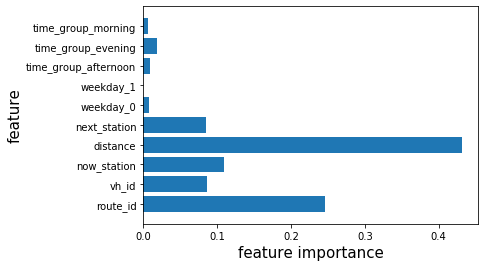

1.0

In [30]:
# 4. 데이터 분석 결과 및 정리 - (1) 데이터 특성 중요도 분석 및 시각화
# 각 feature의 중요도를 분석한다. 해당 데이터를 중심으로 feature engineering을 진행해보기 위함.


import matplotlib.pyplot as plt # 그래프 시각화
import seaborn as sns # 그래프 시각화

n_feature = X_train.shape[1] #주어진 변수들의 갯수를 구함
index = np.arange(n_feature)

plt.barh(index, model.feature_importances_, align='center') #
plt.yticks(index, input_var)
plt.ylim(-1, n_feature)
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)
plt.show()
np.sum(model.feature_importances_)

# => 진행 결과 distance 가 가장 중요한 판단 지표가 되었고, 버스 노선이 시간 예측에 상당한 지분을 차지하였다. (지역적 위치 정보도 반영되는 듯 하다)
# => 출발/도착 정류장 종류도 유의미한 가중치를 가졌다.

In [32]:
# 4. 데이터 분석 결과 및 정리 - (2) 제출용 파일 생성
result = model.predict(Xtest) # 시험 데이터 예측

test_data['next_arrive_time'] = result # next_arrive_time 예측 결과로 추가
test_data[['id', 'next_arrive_time']].to_csv('result.csv',index=False, float_format='%.14f') # csv로 변환

print('제출용 파일 생성 완료')
submission_file = pd.read_csv('result.csv', engine='python')
submission_file.head()

제출용 파일 생성 완료


,id,next_arrive_time
0,210457,38.249634
1,210458,49.564381
2,210459,119.720512
3,210460,58.538193
4,210461,148.249146
